In [1]:
from Atlas.Atlas import Atlas
from AUtils import Simulator
from AUtils import load_NWB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import pynwb
import remfile 
import h5py

from dandi.dandiapi import DandiAPIClient

/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bodypart    = 'head'
datapath = '/Users/danielysprague/foco_lab/data'
#folders = ['NP_nwb', 'NWB_chaudhary']
#folders = ['NP_nwb', 'NWB_chaudhary', 'Yemini_NWB', 'NWB_foco', 'NWB_Ray', 'dandi:000692']
folders = ['dandi:000692']
ims = load_NWB.load_NWB(datapath, folders, bodypart=bodypart) # Simulate worms from the generative model

In [5]:
bodypart    = 'head'
datapath = '/Users/danielysprague/foco_lab/data'
#folders = ['NP_nwb', 'NWB_chaudhary']
folders = ['NP_nwb', 'NWB_chaudhary', 'Yemini_NWB', 'NWB_foco', 'NWB_Ray', 'dandi:000692']
ims = load_NWB.load_NWB(datapath, folders, bodypart=bodypart) # Simulate worms from the generative model

/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'ndx-multichannel-volume' version 0.1.9 because version 0.1.11 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'ndx-multichannel-volume' version 0.1.9 because version 0.1.11 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'ndx-multichannel-volume' version 0.1.9 because version 0.1.11 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/hdmf/spec/name

(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 0 - Cost (pos,col): [1121.0382856234887, 1268.9285608511811]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 1 - Cost (pos,col): [1126.748863160723, 1291.8603562591918]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 2 - Cost (pos,col): [1127.4037190653398, 1281.8387334937152]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 3 - Cost (pos,col): [1127.4517371518616, 1273.175768289566]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 4 - Cost (pos,col): [1127.410828619532, 1268.4979357490256]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 5 - Cost (pos,col): [1127.3676983434088, 1266.3509720984443]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 6 - Cost (pos,col): [1127.334893734115, 1265.423501472286]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 7 - Cost (pos,col): [1127.312508409709, 1265.0301298392792]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 8 - Cost (pos,col): [1127.2988431951462, 1264.863979193437]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 9 - Cost

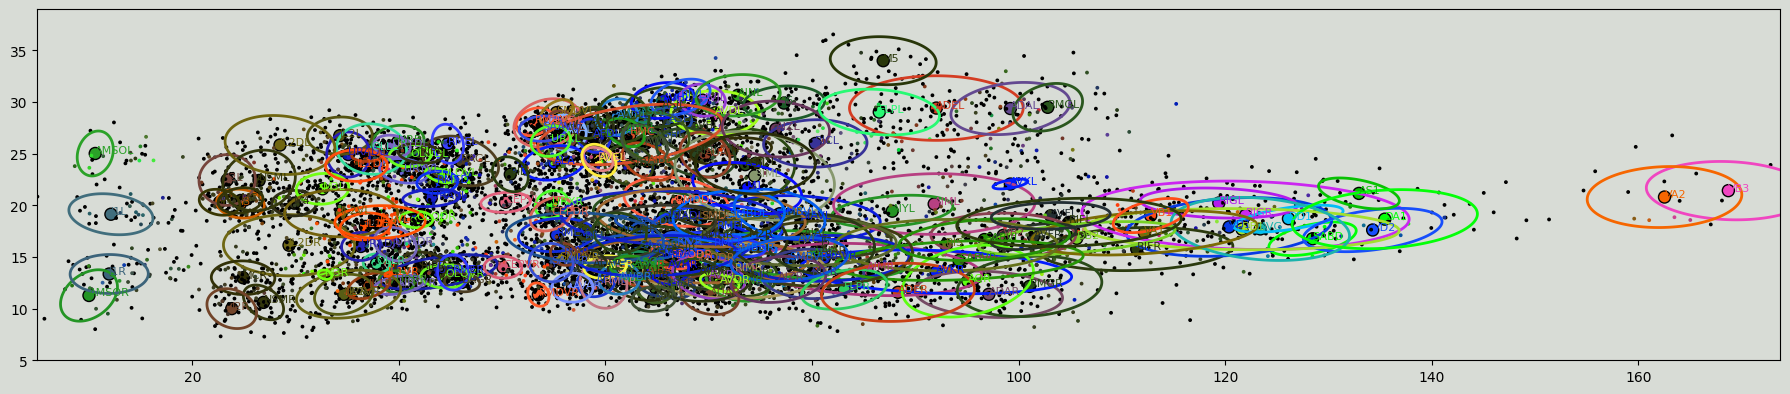

In [6]:
'''
Train atlas on all datasets.

Currently implemented by passing in all ims that you want aligned to the atlas.

Match_indexes determines which datasets are candidates for the match initialization. This should not affect the final outcome,
but some errors occurred when less labeled datasets were included here. This is currently set to only include the first 10 datasets
in ims, which are the original 10 NeuroPAL datasets.

Train_indices determiens which datasets are used to train the atlas. All datasets will be aligned to the atlas, but only datasets included
in train_indices will be used to update the atlas means and covariances. Here this just includes all datasets.
'''

trained_atlas, aligned, params, cost, counts = Atlas.train_atlas(ims,bodypart, match_indexes=range(10), train_indices=range(len(ims))) # Train atlas on the sample worms
aligned_atlas, final_aligned, params = Atlas.major_axis_align(trained_atlas, aligned, params, shift=10)
Atlas.visualize_pretty(aligned_atlas,final_aligned,'')

In [7]:
import pickle 

'''
Save atlas named with date of run and add description of what is included in the atlas.
'''

aligned_atlas['description'] = 'Atlas trained using all data from NP orginal, Yemini 21, Foco, Ray, Chaudhary, Kimura datasets. Histogram matched, Z-scored, and median sampled'

with open('/Users/danielysprague/foco_lab/data/atlases/2023_11_14_1_full.pkl', 'wb') as f:
    pickle.dump(aligned_atlas, f)
        
with open('/Users/danielysprague/foco_lab/data/atlases/2023_11_14_1_full.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [2]:
bodypart    = 'head'
datapath = '/Users/danielysprague/foco_lab/data'
folders = ['NP_nwb', 'NWB_chaudhary']
ims_NP = load_NWB.load_NWB(datapath, folders, bodypart=bodypart) # Simulate worms from the generative model

/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'ndx-multichannel-volume' version 0.1.9 because version 0.1.11 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'ndx-multichannel-volume' version 0.1.9 because version 0.1.11 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'ndx-multichannel-volume' version 0.1.9 because version 0.1.11 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/StatAtlas/lib/python3.11/site-packages/hdmf/spec/name

(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 0 - Cost (pos,col): [1209.0385292047836, 1996.8806611520192]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 1 - Cost (pos,col): [1212.9014265109306, 1992.6998799626647]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 2 - Cost (pos,col): [1212.3423502300195, 1982.1783274401678]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 3 - Cost (pos,col): [1211.8054112218242, 1974.489425408159]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 4 - Cost (pos,col): [1211.4319259477907, 1969.1459595143926]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 5 - Cost (pos,col): [1211.1921079063443, 1965.5406698814004]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 6 - Cost (pos,col): [1211.056342119928, 1963.1435627397295]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 7 - Cost (pos,col): [1211.0005232846866, 1961.5574296917762]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 8 - Cost (pos,col): [1211.0052921706065, 1960.5066333348393]
(194, 6)
(6, 6, 194)
(194, 6, 79)
Iteration: 9 -

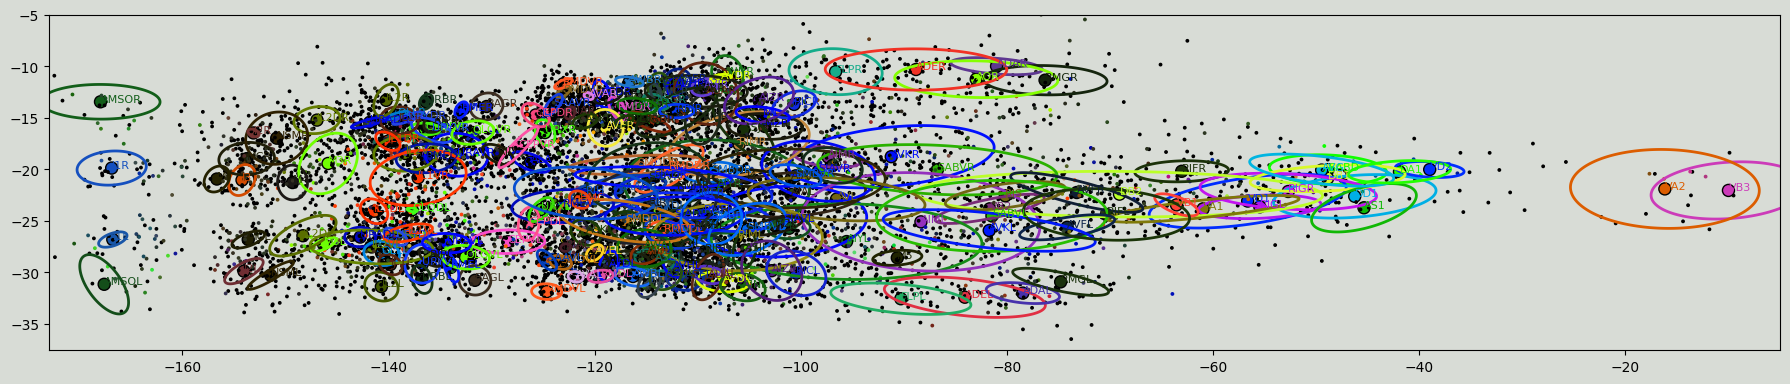

In [12]:
'''
Same as above except only original 10 NeuroPAL datasets are included in the training set
'''

trained_atlas_NP, aligned_NP, params_NP, cost_NP, counts_NP = Atlas.train_atlas(ims,bodypart, match_indexes=range(10), train_indices = range(10)) # Train atlas on the sample worms
aligned_atlas_NP, final_aligned_NP, params_NP = Atlas.major_axis_align(trained_atlas_NP, aligned_NP, params_NP, shift=10)
Atlas.visualize_pretty(aligned_atlas_NP,final_aligned_NP,'')

In [14]:
import pickle 

aligned_atlas_NP['description'] = 'Atlas trained using all data from NP orginal. Histogram matched, Z-scored, and median sampled'

with open('/Users/danielysprague/foco_lab/data/atlases/NP_original.pkl', 'wb') as f:
    pickle.dump(aligned_atlas_NP, f)
        
with open('/Users/danielysprague/foco_lab/data/atlases/NP_original.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [9]:
print(loaded_dict.keys())

dict_keys(['bodypart', 'mu', 'sigma', 'names', 'aligned', 'description'])


In [10]:
print(aligned_atlas.keys())
print(len(aligned_atlas['names'])) #List of neurons included in the atlas
print(aligned_atlas['mu'].shape) #Nx6 array of neuron means
print(aligned_atlas['sigma'].shape) #6x6xN array of neuron covariances
print(aligned_atlas['aligned'].shape) #Nx6xD array of neuron locations in each dataset with NaN values where neurons missing
#TODO: need to get fully aligned point cloud not just neurons with a ground truth label
#TODO: get fully aligned point cloud by returning Beta for affine transformation and transforming full point cloud

dict_keys(['bodypart', 'mu', 'sigma', 'names', 'aligned', 'description'])
194
(194, 6)
(6, 6, 194)
(194, 6, 70)


In [9]:
#folders = ['NP_nwb', 'NWB_chaudhary']
folders = ['NP_nwb', 'NWB_chaudhary', 'Yemini_NWB', 'NWB_foco', 'NWB_Ray']
file_names = []

for folder in folders:
    for file in os.listdir('/Users/danielysprague/foco_lab/data/'+folder):
        if file[-4:] == '.nwb':
            file_names.append(file[:-4])

for file in os.listdir('/Users/danielysprague/foco_lab/data/Kimura_images'):
    if file[-4:] == '.mat':
        file_names.append(file[:-4])
print(file_names)



['56_YAaDV', '38_YAaDV', '76_YAaDV', '11_YAaLR', '64_YAaDV', '70_YAaLR', '55_YAaDV', '7_YAaLR', '62_YAaLR', '20_YAaLR', '2', '3', '1', '4', '5', '7', '6', '8', '9', '20190928_08', '20190929_02', '20190929_03', '20190925_01', '20191030_07', '20190925_04', '20191030_03', '20190929_05', '20190929_07', '20190929_06', '20191104_10', '20191104_08', '20190924_01', '20190928_01', '20190928_03', '20190924_03', '20190924_02', '20190928_13', '20190928_07', '20190928_11', '20190928_05', '2021-12-03-w00-NP1', '2022-03-05-w00-NP1', '2022-02-12-w00-NP1', '2022-02-22-w04-NP1', '2022-02-11-w03-NP1', '2022-02-12-w01-NP1', '2022-01-22-w04-NP1', '2022-04-26-w01-NP1', '2022-04-26-w00-NP1', '2022-04-01-w00-NP1', '20230412-20-15-17', '20230506-14-24-57', '20230510-13-25-46', '20230322-22-43-03', '20221106-21-47-31', '20230506-12-56-00', '20221106-21-00-09', '20230322-20-16-50', '20221028-18-48-00', '20230506-13-32-08', '20230510-16-36-46', '20230506-15-33-51', '20230510-15-49-47', '20221215-20-02-49', '20230

In [10]:
import pandas as pd

'''
Save aligned point clouds from atlas
'''

for i, im in enumerate(ims):
    filename = file_names[i]

    pos = im.get_positions()
    col = im.get_colors_readout()
    labels = np.transpose(np.asarray(im.get_annotations()))

    beta = params['beta'][:,:,i]
    beta0 = params['beta0'][:,:,i]

    xyzrgb = np.hstack((pos,col))

    #alignedxyzrgb = aligned[i]
    alignedxyzrgb = xyzrgb@beta+beta0

    alignedxyzrgb = alignedxyzrgb.astype(float)

    if np.isnan(alignedxyzrgb).any():
        print(filename)
        for i in range(alignedxyzrgb.shape[0]):
            if np.isnan(alignedxyzrgb[i,:]).any():
                print(i)
                print(labels[i])
                print(alignedxyzrgb[i,:])

    data = np.hstack((xyzrgb, alignedxyzrgb, np.expand_dims(labels,axis=1)))

    df = pd.DataFrame(data, columns=['real_X','real_Y','real_Z', 'real_R', 'real_G', 'real_B','aligned_x','aligned_y','aligned_z', 'aligned_R','aligned_G', 'aligned_B', 'ID'])

    df.to_csv('/Users/danielysprague/foco_lab/data/aligned_full/'+filename+'.csv')



In [13]:
import pandas as pd

for i, im in enumerate(ims):
    filename = file_names[i]

    pos = im.get_positions()
    col = im.get_colors_readout()
    labels = np.transpose(np.asarray(im.get_annotations()))

    beta = params_NP['beta'][:,:,i]
    beta0 = params_NP['beta0'][:,:,i]

    xyzrgb = np.hstack((pos,col))

    #alignedxyzrgb = aligned[i]
    alignedxyzrgb = xyzrgb@beta+beta0

    alignedxyzrgb = alignedxyzrgb.astype(float)

    if np.isnan(alignedxyzrgb).any():
        print(filename)
        for i in range(alignedxyzrgb.shape[0]):
            if np.isnan(alignedxyzrgb[i,:]).any():
                print(i)
                print(labels[i])
                print(alignedxyzrgb[i,:])

    data = np.hstack((xyzrgb, alignedxyzrgb, np.expand_dims(labels,axis=1)))

    df = pd.DataFrame(data, columns=['real_X','real_Y','real_Z', 'real_R', 'real_G', 'real_B','aligned_x','aligned_y','aligned_z', 'aligned_R','aligned_G', 'aligned_B', 'ID'])

    df.to_csv('/Users/danielysprague/foco_lab/data/aligned_NP/'+filename+'.csv')

